In [1]:
# Clone the tensorflow models repository from GitHub
!pip uninstall Cython -y # Temporary fix for "No module named 'object_detection'" error
!git clone --depth 1 https://github.com/tensorflow/models

Found existing installation: Cython 3.0.11
Uninstalling Cython-3.0.11:
  Successfully uninstalled Cython-3.0.11
Cloning into 'models'...
remote: Enumerating objects: 4305, done.
remote: Counting objects: 100% (4305/4305), done.
remote: Compressing objects: 100% (3290/3290), done.
remote: Total 4305 (delta 1210), reused 2188 (delta 942), pack-reused 0 (from 0)
Receiving objects: 100% (4305/4305), 53.16 MiB | 9.13 MiB/s, done.
Resolving deltas: 100% (1210/1210), done.
Updating files: 100% (3875/3875), done.


In [2]:
# Copy setup files into models/research folder
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
#cp object_detection/packages/tf2/setup.py .

In [3]:
# Modify setup.py file to install the tf-models-official repository targeted at TF v2.8.0
import re
with open('/content/models/research/object_detection/packages/tf2/setup.py') as f:
    s = f.read()

with open('/content/models/research/setup.py', 'w') as f:
    # Set fine_tune_checkpoint path
    s = re.sub('tf-models-official>=2.5.1',
               'tf-models-official==2.8.0', s)
    f.write(s)

In [4]:
# Install the Object Detection API (NOTE: This block takes about 10 minutes to finish executing)

# Need to do a temporary fix with PyYAML because Colab isn't able to install PyYAML v5.4.1
!pip install pyyaml==5.3
!pip install /content/models/research/

# Need to downgrade to TF v2.8.0 due to Colab compatibility bug with TF v2.10 (as of 10/03/22)
!pip install tensorflow==2.8.0

# Install CUDA version 11.0 (to maintain compatibility with TF v2.8.0)
!pip install tensorflow_io==0.23.1
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget http://developer.download.nvidia.com/compute/cuda/11.0.2/local_installers/cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-11-0-local_11.0.2-450.51.05-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1804-11-0-local/7fa2af80.pub
!apt-get update && sudo apt-get install cuda-toolkit-11-0
!export LD_LIBRARY_PATH=/usr/local/cuda-11.0/lib64:$LD_LIBRARY_PATH

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.3-cp310-cp310-linux_x86_64.whl size=44245 sha256=2b5596769648130fb6bbc9dde449c2e64f31fd2ac4f8c7fb344db111fe526fc2
  Stored in directory: /root/.cache/pip/wheels/0d/72/68/a263cfc14175636cf26bada99f13b735be1b60a11318e08bfc
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2024.10.0 requires pyyaml>=5.3.1, but you have pyyaml 5.3 which is incompatible.
flax 0.8.5 requires PyYAML>=5.4.1, but you have pyyaml 5.3 which is incompatible.
Processing ./models/research
  Preparing metadata (setup.py) ... done
  Preparing metadat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 23.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.1
    Uninstalling tensorflow-2.8.1:
      Successfully uninstalled tensorflow-2.8.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.37.1
    Uninstalling tensorflow-io-gcs-filesystem-0.37.1:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.37.1
  Attempting uninstall: tensorflow_io
    Found existing installation: tensorflow-io 0.37.1
    Uninstalling tensorflow-io-0.37.1:
      Successfully uninstalled tensorflow-io-0.37.1
--2024-11-03 16:24:24--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1

In [5]:
# Run Model Bulider Test file, just to verify everything's working properly
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py


2024-11-03 06:11:11.769920: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-11-03 06:11:11.769978: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
Running tests under Python 3.10.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W1103 06:11:12.098692 139183391252480 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.78s
I1103 06:11:12.560130 139183391252480 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.78s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_mod

In [28]:
import tensorflow as tf

def inspect_tfrecord(tfrecord_file):
    raw_dataset = tf.data.TFRecordDataset(tfrecord_file)

    for raw_record in raw_dataset.take(5):  # Tomar un ejemplo del dataset
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        print(example)

# Ruta al archivo TFRecord
tfrecord_file = '/content/train.tfrecord'
inspect_tfrecord(tfrecord_file)

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\002\200\002\200\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\

Nuevo archivo TFRecord con bounding boxes ajustadas guardado en /content/optimized_train.tfrecord
Nuevo archivo TFRecord con bounding boxes ajustadas guardado en /content/optimized_valid.tfrecord


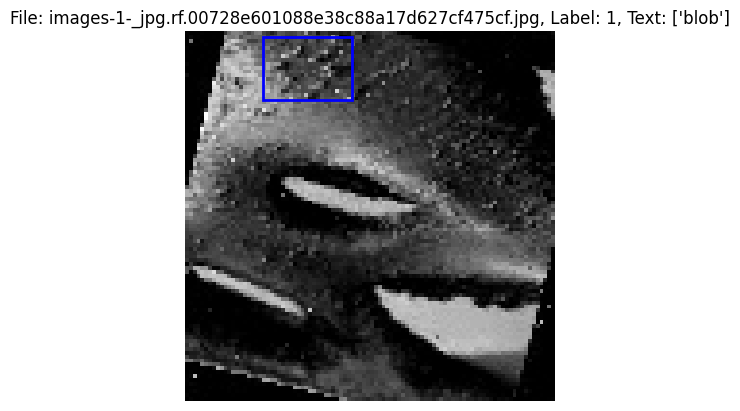

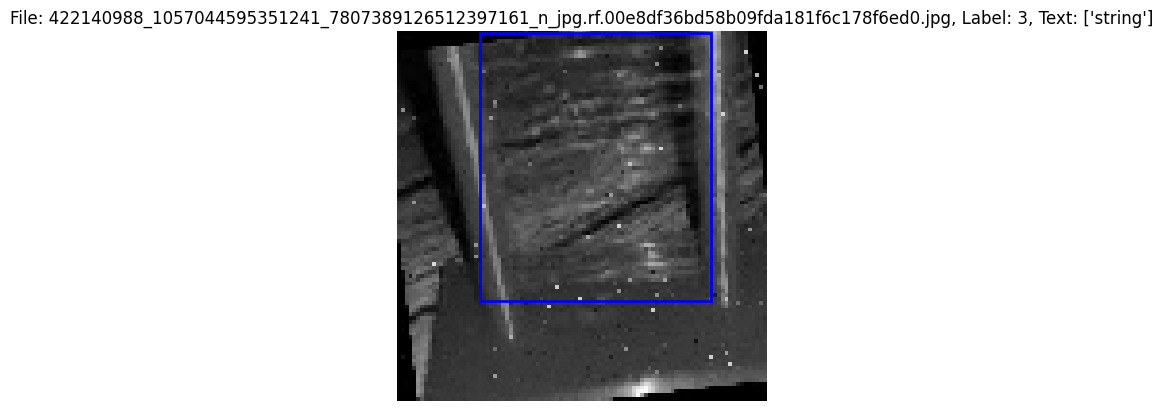

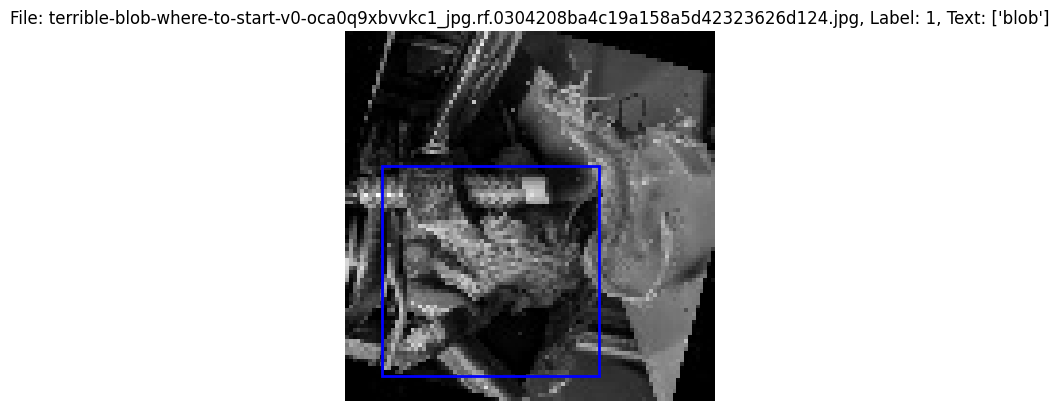

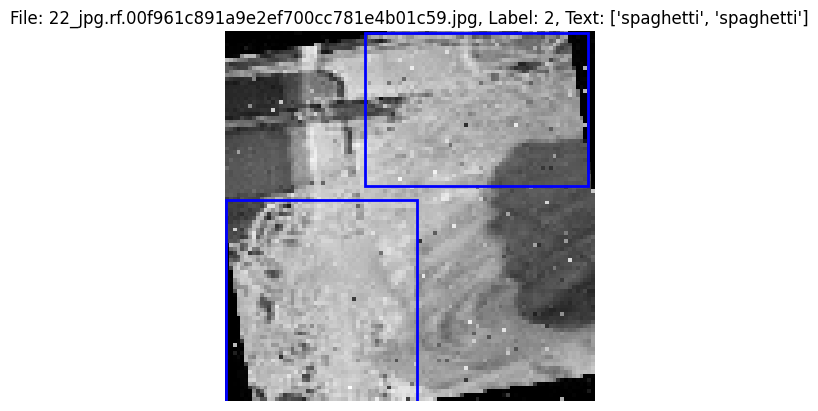

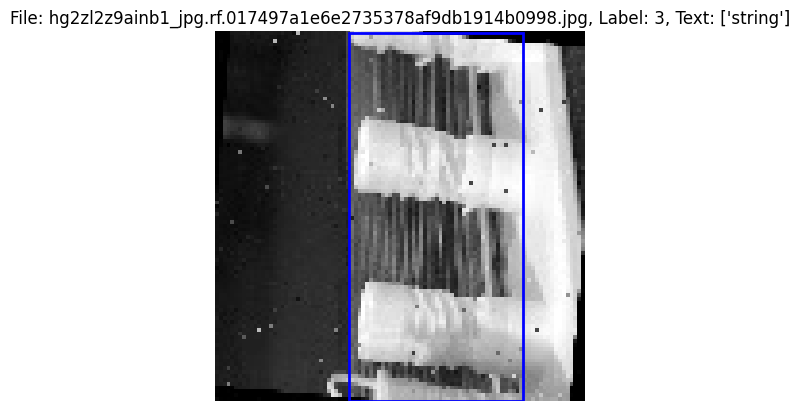

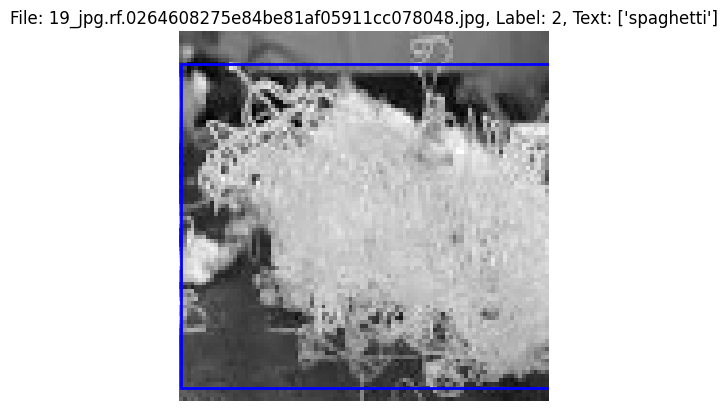

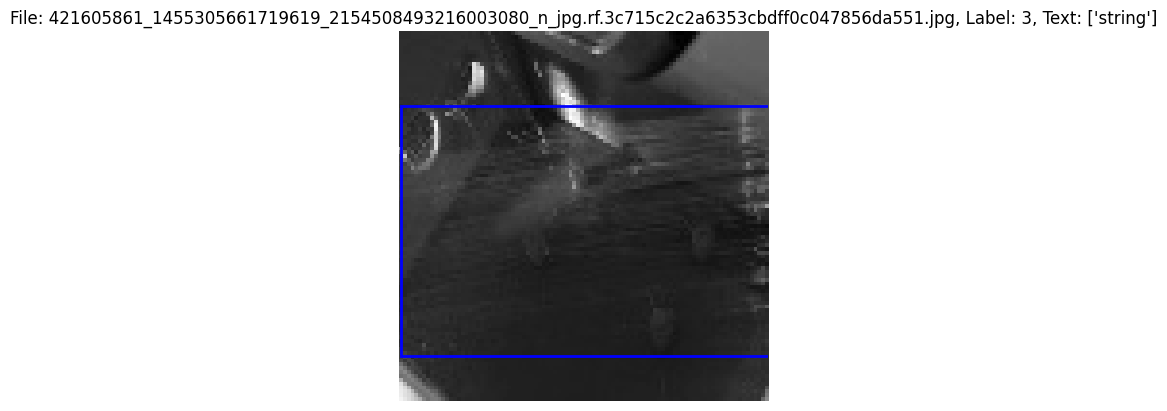

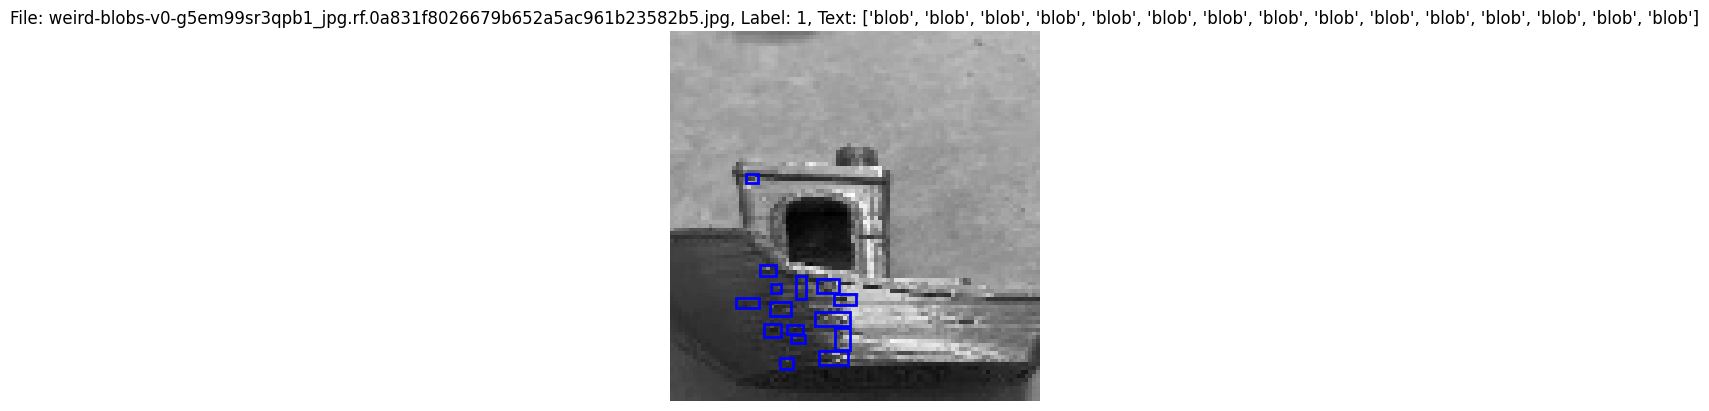

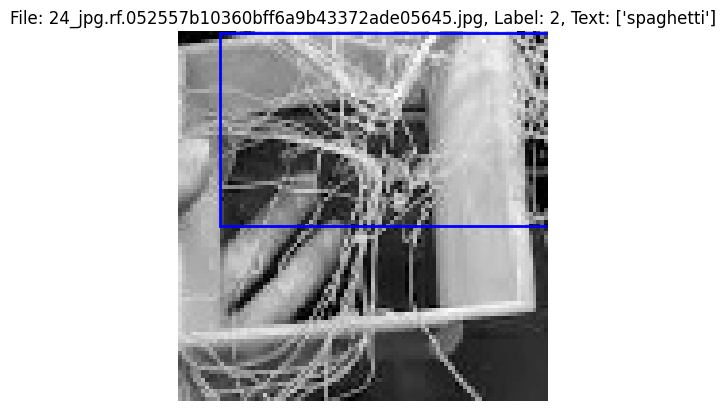

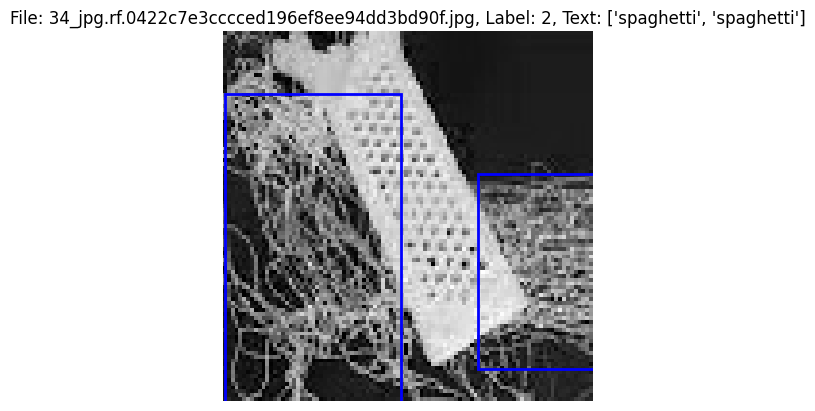

In [10]:
# Testing Scaling TFRecord Images and Labels
import tensorflow as tf

import matplotlib.patches as patches
import matplotlib.pyplot as plt

def _parse_function(proto):
  keys_to_features = {
        'image/encoded': tf.io.FixedLenFeature([], tf.string),
        'image/filename': tf.io.FixedLenFeature([], tf.string),
        'image/format': tf.io.FixedLenFeature([], tf.string),
        'image/height': tf.io.FixedLenFeature([], tf.int64),
        'image/width': tf.io.FixedLenFeature([], tf.int64),
        'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
        'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
        'image/object/class/label': tf.io.VarLenFeature(tf.int64),
        'image/object/class/text': tf.io.VarLenFeature(tf.string)
    }

  parsed_features = tf.io.parse_single_example(proto, keys_to_features)

  image = tf.io.decode_jpeg(parsed_features['image/encoded'], channels=3)
  original_size = tf.shape(image)[:2]
  new_size = [96,96]
  image = tf.image.resize(image, new_size)
  image = tf.cast(image,tf.float32) / 255.0

  image_gray = tf.image.rgb_to_grayscale(image)

  #x_scale = new_size[1] / tf.cast(original_size[1], tf.float32)
  #y_scale = new_size[0] / tf.cast(original_size[0], tf.float32)

  xmin = tf.sparse.to_dense(parsed_features['image/object/bbox/xmin'])
  ymin = tf.sparse.to_dense(parsed_features['image/object/bbox/ymin'])
  xmax = tf.sparse.to_dense(parsed_features['image/object/bbox/xmax'])
  ymax = tf.sparse.to_dense(parsed_features['image/object/bbox/ymax'])

  filename = parsed_features['image/filename']
  image_format = parsed_features['image/format']
  height = parsed_features['image/height']
  width = parsed_features['image/width']
  class_label = tf.sparse.to_dense(parsed_features['image/object/class/label'])#[0]

  class_label = tf.cond(tf.equal(tf.size(class_label), 0),
                        lambda: tf.constant(-1, dtype=tf.int64), # or any other suitable default
                        lambda: class_label[0])

  class_text = tf.sparse.to_dense(parsed_features['image/object/class/text'])

  bboxes = tf.stack([xmin,ymin,xmax,ymax],1)

  return  image_gray, bboxes, filename, image_format, height, width, class_label, class_text

def _serialize_example(image,bboxes, filename, image_format, height, width, class_label, class_text
):
  image = tf.cast(image * 255.0, tf.uint8)
  image = tf.io.encode_jpeg(image)

  class_text = class_text.numpy()
  class_text = [text.decode('utf-8') if isinstance(text,bytes) else text for text in class_text]
  class_text = [text.encode('utf-8') for text in class_text]

  feature = {
      'image/encoded': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image.numpy()])),
      'image/object/bbox/xmin': tf.train.Feature(float_list=tf.train.FloatList(value=bboxes[:,0].numpy().tolist())),
      'image/object/bbox/ymin': tf.train.Feature(float_list=tf.train.FloatList(value=bboxes[:,1].numpy().tolist())),
      'image/object/bbox/xmax': tf.train.Feature(float_list=tf.train.FloatList(value=bboxes[:,2].numpy().tolist())),
      'image/object/bbox/ymax': tf.train.Feature(float_list=tf.train.FloatList(value=bboxes[:,3].numpy().tolist())),
      'image/filename': tf.train.Feature(bytes_list=tf.train.BytesList(value=[filename.numpy()])),
      'image/format': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_format.numpy()])),
      'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[26])),
      'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[26])),
      'image/object/class/label': tf.train.Feature(int64_list=tf.train.Int64List(value=[class_label.numpy()])),
      'image/object/class/text': tf.train.Feature(bytes_list=tf.train.BytesList(value=class_text))
  }

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

def save_resized_images_and_bboxes_to_tfrecord(input_tfrecord, output_tfrecord):
  raw_dataset = tf.data.TFRecordDataset(input_tfrecord)
  parsed_dataset = raw_dataset.map(_parse_function)

  with tf.io.TFRecordWriter(output_tfrecord) as writer:
    for image_gray, bboxes, filename, image_format, height, width, class_label, class_text in parsed_dataset:
      example = _serialize_example(image_gray,bboxes, filename, image_format, height, width, class_label, class_text)
      writer.write(example)

input_tfrecord = '/content/train.tfrecord'
output_tfrecord = '/content/optimized_train.tfrecord'

#save_resized_images_and_bboxes_to_tfrecord(input_tfrecord,output_tfrecord)
print(f"Nuevo archivo TFRecord con bounding boxes ajustadas guardado en {output_tfrecord}")

input_tfrecord = '/content/valid.tfrecord'
output_tfrecord = '/content/optimized_valid.tfrecord'

#save_resized_images_and_bboxes_to_tfrecord(input_tfrecord,output_tfrecord)
print(f"Nuevo archivo TFRecord con bounding boxes ajustadas guardado en {output_tfrecord}")

def load_tfrecord_dataset(tfrecord_file, batch_size=1):
    dataset = tf.data.TFRecordDataset(tfrecord_file)
    dataset = dataset.map(_parse_function)
    dataset = dataset.batch(batch_size)
    return dataset

tfrecord_file = '/content/optimized_train.tfrecord'
dataset = load_tfrecord_dataset(tfrecord_file)

def display_images_from_dataset(dataset, num_images=5):
    # Iterar sobre el dataset
    for image_batch, bbox_batch, filename_batch, format_batch, height_batch, width_batch, class_label_batch, class_text_batch in dataset.take(num_images):
        for i in range(image_batch.shape[0]):
            image = image_batch[i].numpy().squeeze()  # Convertir a numpy para visualizar
            bboxes = bbox_batch[i].numpy()

            fig, ax = plt.subplots(1)
            ax.imshow(image, cmap='gray')

            for bbox in bboxes:
              bbox = bbox.astype(float)
              rect = patches.Rectangle(
                  (bbox[0]*96, bbox[1]*96),  # Coordenadas (xmin, ymin)
                  bbox[2]*96 - bbox[0]*96,  # Ancho
                  bbox[3]*96 - bbox[1]*96,  # Alto
                  linewidth=2, edgecolor='b', facecolor='none'
              )
              ax.add_patch(rect)

            filename = filename_batch[i].numpy().decode('utf-8')
            class_label = class_label_batch[i].numpy()
            #class_text = class_text_batch[i].numpy()
            class_text = [text.decode('utf-8') for text in class_text_batch[i].numpy()]

            ax.set_title(f'File: {filename}, Label: {class_label}, Text: {class_text}')

            plt.axis('off')
            plt.show()

# Mostrar las primeras 5 imágenes del archivo TFRecord
display_images_from_dataset(dataset, num_images=5)

tfrecord_file = '/content/optimized_valid.tfrecord'
dataset = load_tfrecord_dataset(tfrecord_file)
display_images_from_dataset(dataset, num_images=5)

In [11]:
train_record_fname = '/content/optimized_train.tfrecord'
val_record_fname = '/content/optimized_valid.tfrecord'
label_map_pbtxt_fname = '/content/labelmap.pbtxt'

In [6]:
import tensorflow as tf

import matplotlib.patches as patches
import matplotlib.pyplot as plt

In [12]:
def map_dataset(image_gray, bboxes, filename, image_format, height, width, class_label, class_text):
  """Maps the dataset to extract features and labels.

  Args:
    example: A single example from the dataset.

  Returns:
    A tuple containing features (x) and labels (y).
  """

  # Decode the image and resize it if needed
  image = tf.reshape(image_gray, [96, 96, 1])  # Reshape to your desired image dimensions
  #image = tf.squeeze(image, axis=-1)
  image = tf.expand_dims(image, axis=0)
  image = tf.cast(image, tf.float32)  # Normalize image

  # One-hot encode the label if necessary
  label = tf.one_hot(class_label, depth=3)  # Replace 24 with the number of classes

  return image, label

train_tfrecord_file = '/content/optimized_train.tfrecord'
train_dataset = load_tfrecord_dataset(train_tfrecord_file).map(map_dataset)
print(train_dataset)

valid_tfrecord_file = '/content/optimized_valid.tfrecord'
valid_dataset = load_tfrecord_dataset(valid_tfrecord_file).map(map_dataset)
print(valid_dataset)

<MapDataset element_spec=(TensorSpec(shape=(1, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(1, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [37]:
model = Sequential()
model.add(Conv2D(48 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (96,96,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(30 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 64 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 3 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 48)        480       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 48)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 30)        12990     
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 30)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 25)       

In [16]:
history = model.fit( train_dataset, epochs = 100, validation_data = valid_dataset , callbacks = [learning_rate_reduction])

NameError: name 'model' is not defined

In [39]:
model.save('spaghetti.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

def representative_data_gen():
  for input_value, _ in train_dataset.take(50):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter.convert()

with open('model_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [15]:
loaded_model = tf.keras.models.load_model('/content/model_v2.h5')
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 48)        480       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 48)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 30)        12990     
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 30)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 25)       

In [20]:
loaded_model.fit(train_dataset, epochs = 100, validation_data = valid_dataset , callbacks = [learning_rate_reduction])

#loaded_model.save('spaghetti.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

def representative_data_gen():
  for input_value, _ in train_dataset.take(50):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_quant_model = converter.convert()

with open('model_quant.tflite', 'wb') as f:
  f.write(tflite_quant_model)

from google.colab import files
files.download('spaghetti.h5')
files.download('model.tflite')
files.download('model_quant.tflite')

Epoch 1/100
603/603 [==============================] - 20s 33ms/step - loss: 0.0459 - accuracy: 0.6119 - val_loss: 0.8392 - val_accuracy: 0.3684 - lr: 1.0000e-05
Epoch 2/100
603/603 [==============================] - 19s 32ms/step - loss: 0.0437 - accuracy: 0.6103 - val_loss: 0.8488 - val_accuracy: 0.3860 - lr: 1.0000e-05
Epoch 3/100
603/603 [==============================] - 19s 32ms/step - loss: 0.0392 - accuracy: 0.6136 - val_loss: 0.8526 - val_accuracy: 0.3860 - lr: 1.0000e-05
Epoch 4/100
603/603 [==============================] - 22s 37ms/step - loss: 0.0434 - accuracy: 0.6036 - val_loss: 0.8522 - val_accuracy: 0.3684 - lr: 1.0000e-05
Epoch 5/100
603/603 [==============================] - 21s 35ms/step - loss: 0.0505 - accuracy: 0.6070 - val_loss: 0.8520 - val_accuracy: 0.3860 - lr: 1.0000e-05
Epoch 6/100
603/603 [==============================] - 19s 32ms/step - loss: 0.0412 - accuracy: 0.6070 - val_loss: 0.8373 - val_accuracy: 0.3860 - lr: 1.0000e-05
Epoch 7/100
603/603 [=======

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = loaded_model.evaluate(train_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

603/603 [==============================] - 8s 13ms/step - loss: 0.0103 - accuracy: 0.6169
Loss: 0.010316375643014908
Accuracy: 0.6169154047966003


In [22]:
# Obtener predicciones del modelo
predictions = loaded_model.predict(train_dataset)
# Aplicar un umbral (ej. 0.5) para obtener predicciones binarias
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

In [23]:
import numpy as np
# Seleccionar una imagen del conjunto de prueba
image, label = train_dataset[0]
predicted_probabilities = loaded_model.predict(np.expand_dims(image, axis=0))[0]

# Imprimir probabilidades
for i, probability in enumerate(predicted_probabilities):
 print(f"{['blob', 'spaghetti', 'string'][i]}: {probability:.2f}")

# Mostrar la imagen
plt.imshow(image, cmap='gray')
plt.title("Etiqueta Real: " + str(label))
plt.show()

TypeError: 'MapDataset' object is not subscriptable

In [18]:
from google.colab import files
files.download('optimized_train.tfrecord')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
def representative_data_gen():
  for input_value, _ in train_dataset.take(50):
    yield [input_value]

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
tflite_model = converter.convert()

# Save the model.
with open('model_quant.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
